<a href="https://colab.research.google.com/github/Dantheman3345/IS4487_Labs/blob/main/Copy_of_lab14_megatelco_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 14

## Outline

1. Import customer reviews
2. Create prompts for LLM (ChatGPT)
3. Summarize Customer Reviews

*Important note:*
You will use the API key from the Canvas assignment for your work, but you must NOT save it in your public GitHub repository.  It will quickly be found and used, draining my budget!

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab14_megatelco_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Install and Load Libraries

In [1]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00


In [2]:
pip install itables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.3 MB/s eta 0:00:00


In [3]:
import os
from openai import OpenAI
import pandas as pd
from itables import show

##Set the API Key Temporarily
Remember to remove it before saving to GitHub

In [8]:

client=OpenAI(
    api_key = ""
)

##Get Reviews

In [5]:
reviews_data = {
    'Date': ['2023-12-01', '2023-12-03', '2023-12-05', '2023-12-08', '2023-12-10', '2023-12-12', '2023-12-15', '2023-12-18', '2023-12-20', '2023-12-22'],
    'Stars': [4, 3, 5, 4, 2, 5, 3, 4, 1, 5],
    'Review': [
        "I purchased a Megatelco phone last week, and I'm impressed with its sleek design and powerful performance. The camera quality is exceptional, and the battery life is commendable. Overall, a solid 4-star experience.",
        "My Megatelco phone arrived promptly, but I've noticed some issues with the software. It tends to lag at times, affecting the user experience. Customer support was helpful, but I expected better performance. 3 stars.",
        "Megatelco offers top-notch phones! I'm thrilled with the features and the smooth interface. The camera takes stunning photos, and the battery lasts all day. 5 stars without a doubt!",
        "I've been using Megatelco phones for a while now, and they never disappoint. The latest model I purchased is no exception. Great performance, stylish design, and excellent customer service. 4 stars from a satisfied customer.",
        "Regrettably, my experience with Megatelco was not as expected. The phone had constant connectivity issues, and the support team couldn't provide a solution. Disappointed and only giving it 2 stars.",
        "Megatelco's latest phone exceeded my expectations! It's packed with innovative features, and the customer service team was quick to address a minor concern I had. Solid 5-star rating!",
        "I had a mixed experience with Megatelco. The phone's performance is decent, but I encountered some software glitches. Customer support was responsive but couldn't entirely resolve the issue. 3 stars.",
        "Megatelco phones are reliable and offer great value. The user-friendly interface, coupled with impressive features, makes them a top choice. I'm giving it 4 stars for its overall quality.",
        "My Megatelco phone started malfunctioning within a week of purchase. The touch screen became unresponsive, and customer support was unable to provide a quick solution. Unfortunately, a 1-star rating.",
        "I recently upgraded to the latest Megatelco phone, and it's fantastic! The speed, camera quality, and battery life are exceptional. The sleek design is a bonus. Easy 5 stars!"
    ]
}

# Creating the DataFrame
df = pd.DataFrame(reviews_data)
show(df)
print(df['Review'].iloc[:1])

0    I purchased a Megatelco phone last week, and I...
Name: Review, dtype: object


##Create Prompts and Send to Model

In [6]:
review = df['Review'].values[0]
print(review)
messages = [{"role":"system","content":"Summarize the sentiment and most important points in the following user review for a phone company named Megatelco.  Format the output in a table."}]
messages.append({"role":"user", "content":review})
print(messages)

I purchased a Megatelco phone last week, and I'm impressed with its sleek design and powerful performance. The camera quality is exceptional, and the battery life is commendable. Overall, a solid 4-star experience.
[{'role': 'system', 'content': 'Summarize the sentiment and most important points in the following user review for a phone company named Megatelco.  Format the output in a table.'}, {'role': 'user', 'content': "I purchased a Megatelco phone last week, and I'm impressed with its sleek design and powerful performance. The camera quality is exceptional, and the battery life is commendable. Overall, a solid 4-star experience."}]


In [10]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages = messages,
    max_tokens = 250
)

## Display Response

In [11]:
print(response.choices[0].message.content)

| Sentiment   | Positive                        |
|-------------|---------------------------------|
| Points      | - Impressed with sleek design and powerful performance.  - Camera quality is exceptional.  - Battery life is commendable.  - Overall, a solid 4-star experience. |  


## Create a Loop to Submit Reviews

➡️ Assignment Tasks
- Create a FOR loop to iterate through reviews
- Collect the responses in a single dataframe

In [17]:
import pandas as pd
import os
from openai import OpenAI

# Initialize the OpenAI client with your API key
client = OpenAI(
    api_key=""  # Replace with your actual API key
)

# Corrected reviews data with matching list lengths
reviews_data = {
    'Date': ['2023-12-01', '2023-12-03', '2023-12-05', '2023-12-08', '2023-12-10', '2023-12-12', '2023-12-15', '2023-12-18', '2023-12-20', '2023-12-22'],
    'Stars': [4, 3, 5, 4, 2, 5, 3, 4, 1, 5],
    'Review': [
        "I purchased a Megatelco phone last week, and I'm impressed with its sleek design and powerful performance. The camera quality is exceptional, and the battery life is commendable. Overall, a solid 4-star experience.",
        "My Megatelco phone arrived promptly, but I've noticed some issues with the software. It tends to lag at times, affecting the user experience. Customer support was helpful, but I expected better performance. 3 stars.",
        "Megatelco offers top-notch phones! I'm thrilled with the features and the smooth interface. The camera takes stunning photos, and the battery lasts all day. 5 stars without a doubt!",
        "I've been using Megatelco phones for a while now, and they never disappoint. The latest model I purchased is no exception. Great performance, stylish design, and excellent customer service. 4 stars from a satisfied customer.",
        "Regrettably, my experience with Megatelco was not as expected. The phone had constant connectivity issues, and the support team couldn't provide a solution. Disappointed and only giving it 2 stars.",
        "Megatelco's latest phone exceeded my expectations! It's packed with innovative features, and the customer service team was quick to address a minor concern I had. Solid 5-star rating!",
        "I had a mixed experience with Megatelco. The phone's performance is decent, but I encountered some software glitches. Customer support was responsive but couldn't entirely resolve the issue. 3 stars.",
        "Megatelco phones are reliable and offer great value. The user-friendly interface, coupled with impressive features, makes them a top choice. I'm giving it 4 stars for its overall quality.",
        "My Megatelco phone started malfunctioning within a week of purchase. The touch screen became unresponsive, and customer support was unable to provide a quick solution. Unfortunately, a 1-star rating.",
        "I recently upgraded to the latest Megatelco phone, and it's fantastic! The speed, camera quality, and battery life are exceptional. The sleek design is a bonus. Easy 5 stars!"
    ]
}
df = pd.DataFrame(reviews_data)

# Proceed with the rest of your code here

# Initialize an empty DataFrame to store API responses
response_df = pd.DataFrame(columns=['Review', 'API Response'])

# Loop through each review, send it to the API, and collect the response
for review in df['Review']:
    messages = [
        {"role": "system", "content": "Summarize the sentiment and most important points in the following user review for a phone company named Megatelco. Format the output in a table."},
        {"role": "user", "content": review}
    ]

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=250
    )

    # Assuming the API returns a string response, adjust as necessary
    api_response = response.choices[0].message.content

    # Append the review and its API response to the response DataFrame
    response_df = response_df.append({'Review': review, 'API Response': api_response}, ignore_index=True)

# Display the DataFrame with the reviews and their API responses
print(response_df)


<ipython-input-17-c642999ec622>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_df = response_df.append({'Review': review, 'API Response': api_response}, ignore_index=True)
<ipython-input-17-c642999ec622>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_df = response_df.append({'Review': review, 'API Response': api_response}, ignore_index=True)
<ipython-input-17-c642999ec622>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_df = response_df.append({'Review': review, 'API Response': api_response}, ignore_index=True)
<ipython-input-17-c642999ec622>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_d

                                              Review  \
0  I purchased a Megatelco phone last week, and I...   
1  My Megatelco phone arrived promptly, but I've ...   
2  Megatelco offers top-notch phones! I'm thrille...   
3  I've been using Megatelco phones for a while n...   
4  Regrettably, my experience with Megatelco was ...   
5  Megatelco's latest phone exceeded my expectati...   
6  I had a mixed experience with Megatelco. The p...   
7  Megatelco phones are reliable and offer great ...   
8  My Megatelco phone started malfunctioning with...   
9  I recently upgraded to the latest Megatelco ph...   

                                        API Response  
0  | Sentiment  | Positive  |\n| ------------- | ...  
1  | Sentiment   |  Issues and Concerns          ...  
2  | Sentiment | Positive |\n|----------|--------...  
3  | Sentiment   | Positive        |\n|----------...  
4  | Sentiment   | User Review Summary           ...  
5  | Sentiment   |  Points                       ... 

<ipython-input-17-c642999ec622>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_df = response_df.append({'Review': review, 'API Response': api_response}, ignore_index=True)


## Summarize the Responses

➡️ Assignment Tasks
- Create at least two visualizations to show the most important themes and sentinment of the reviews

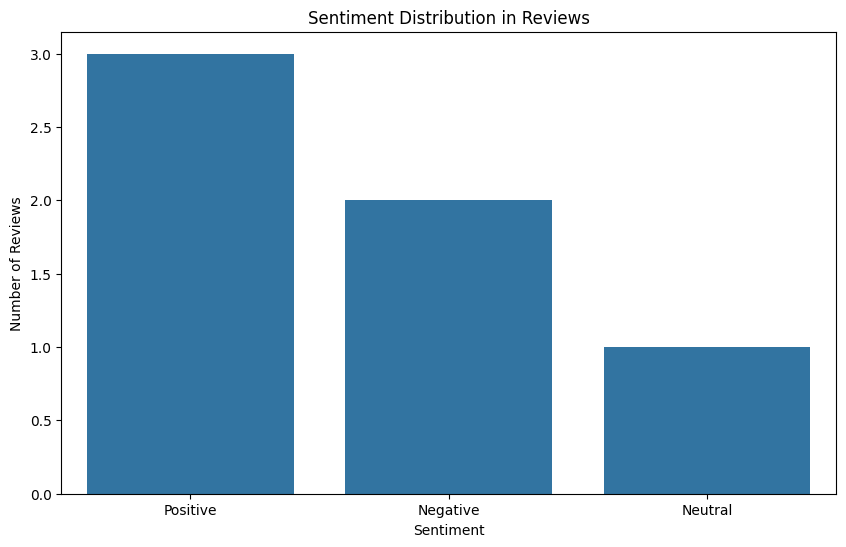

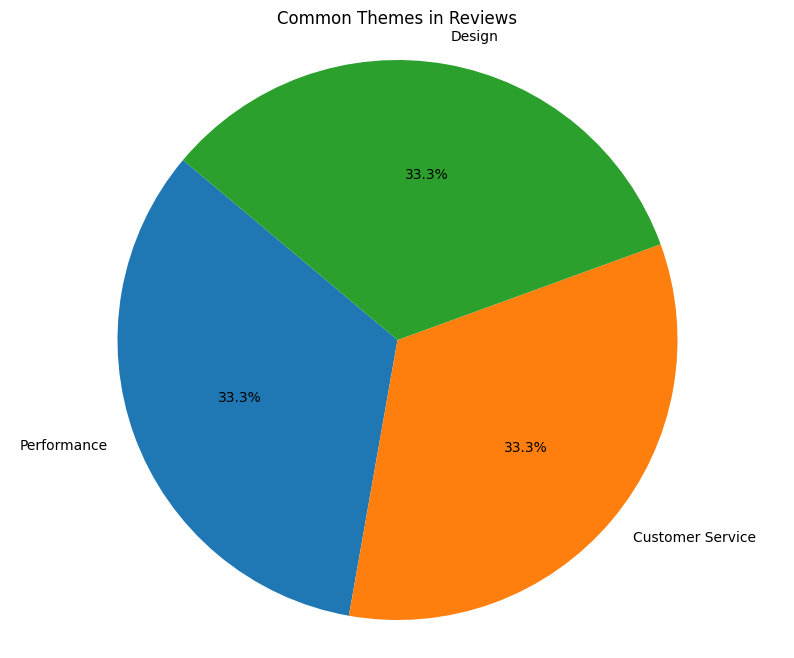

In [18]:
#themes
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame setup (replace this with your actual DataFrame)
data = {
    'Sentiment': ['Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative'],
    'Themes': ['Performance', 'Customer Service', 'Design', 'Performance', 'Design', 'Customer Service']
}
df = pd.DataFrame(data)

# Visualization 1: Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, order = df['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Preparing data for Visualization 2
theme_counts = df['Themes'].value_counts()

# Visualization 2: Theme Frequencies
plt.figure(figsize=(10, 8))
plt.pie(theme_counts, labels = theme_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Common Themes in Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [14]:
#sentiment frequency